Began this project by importing necessary libraries. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Next I loaded the data scraped from Sephora reviews. This data was sourced from Kaggle and contains Product which has the basic information about each product in their catalog. The next 6 databases contained reviews from Sephora users.

In [ ]:
products = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/product_info.csv')
r1 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_0_250.csv')
r2 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_250_500.csv')
r3 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_500_750.csv')
r4 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_750_1000.csv')
r5 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_1000_1500.csv')
r6 = pd.read_csv('/Users/amina/projects/sephora-recommendation/sephora_dataset/reviews_1500_end.csv')

In [5]:
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
r1.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


Going forward, I'll merge the reviews into one large dataset

In [7]:
reviews_df = pd.concat([r1, r2, r3, r4, r5, r6], ignore_index=True)

In [8]:
reviews_df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301131,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1301132,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1301133,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1301134,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


I merged the review dataframe and the product df. This allows me to see the name of each product reviews and further information about it that reviews didn't contain.

In [9]:
merged = pd.merge(reviews_df, products[['product_id', 'primary_category', 'reviews']], on='product_id')

In [10]:
merged

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,reviews
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Skincare,1.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301131,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,...,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301132,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,...,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301133,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,...,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301134,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,...,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0


In [11]:
skincare_df = merged[merged['primary_category'] == 'Skincare']

In [12]:
skincare_df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,reviews
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Skincare,1.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301131,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,...,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301132,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,...,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301133,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,...,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0
1301134,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,...,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,Skincare,1.0


I want the model to output quality, well-reviewed products to users so I'm going to filter out products with a low amount of reviews. To do this I created a chart that analyzes the distribution for reviews. 

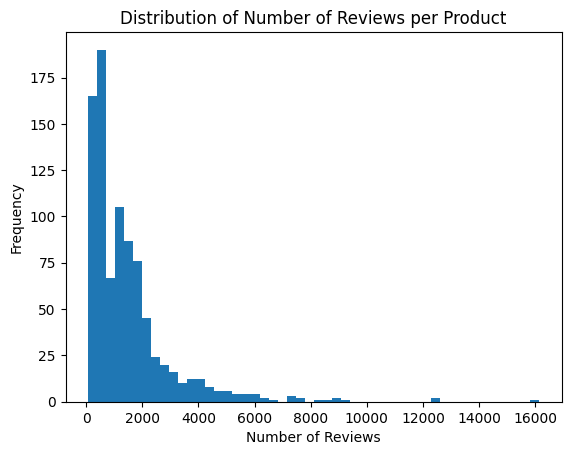

In [13]:

# Group by 'product_id' and count the number of reviews
review_counts = skincare_df.groupby('reviews').size().reset_index(name='num_reviews')
# Plot the distribution of the number of reviews
plt.hist(review_counts['num_reviews'], bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews per Product')
plt.show()


In [14]:
mean_reviews = review_counts['num_reviews'].mean()
median_reviews = review_counts['num_reviews'].median()
percentile_25 = review_counts['num_reviews'].quantile(0.25)
percentile_75 = review_counts['num_reviews'].quantile(0.75)

print(f"Mean Number of Reviews: {mean_reviews:.2f}")
print(f"Median Number of Reviews: {median_reviews:.2f}")
print(f"25th Percentile: {percentile_25:.2f}")
print(f"75th Percentile: {percentile_75:.2f}")

Mean Number of Reviews: 1483.62
Median Number of Reviews: 1137.00
25th Percentile: 463.00
75th Percentile: 1894.00


I filtered out products that are lower than the 25th percentile of number of reviews.

In [88]:
skincare_df = skincare_df[skincare_df['reviews'] >= 1310]

Next, I decided to create a categories for prices based on quantiles and break them into three.

In [90]:

skin_quantiles = 3 
labels = ['low', 'medium', 'high']
skincare_df['price_category'] = pd.qcut(skincare_df['price_usd'], q=skin_quantiles, labels=labels)


In [16]:
skincare_df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,reviews,price_category
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0,low
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0,low
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0,low
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0,low
5,5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,...,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,16118.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558298,558298,2072604008,5,1.0,0.000000,23,23,0,2018-12-15,This product is so creamy and hydrating! I hig...,...,blue,combination,brown,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Skincare,1321.0,high
558299,558299,10522152743,5,1.0,0.867647,68,9,59,2018-12-15,This is my new favorite moisturizer! It’s extr...,...,blue,combination,red,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Skincare,1321.0,high
558300,558300,7933809863,4,1.0,0.928571,14,1,13,2018-12-15,So far I love this! The texture of the cream i...,...,blue,combination,blonde,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Skincare,1321.0,high
558301,558301,5636664041,5,1.0,0.230769,13,10,3,2018-12-15,I’ve been using Genius sleeping collagen and I...,...,brown,combination,brown,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Skincare,1321.0,high


After checking out the df I decided that I should one-hot encode the columns containing the features we'll use for the model.

In [34]:
skincare_df_encoded = pd.get_dummies(skincare_df, columns=['skin_type', 'skin_tone', 'price_category'], drop_first=True)

In [35]:
skincare_df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone_medium,skin_tone_mediumTan,skin_tone_notSureST,skin_tone_olive,skin_tone_porcelain,skin_tone_rich,skin_tone_tan,skin_tone,price_category,skin_type
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,False,False,False,False,False,False,False,Medium,Low,Medium
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,False,False,False,False,False,False,False,Fair,Low,Dry
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,False,False,False,False,False,False,False,Medium,Low,Combination
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,False,False,False,False,False,False,False,Fair,Low,Combination
5,5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,...,False,False,False,False,False,False,False,Fair,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558298,558298,2072604008,5,1.0,0.000000,23,23,0,2018-12-15,This product is so creamy and hydrating! I hig...,...,False,False,False,False,False,False,False,Medium,High,Combination
558299,558299,10522152743,5,1.0,0.867647,68,9,59,2018-12-15,This is my new favorite moisturizer! It’s extr...,...,False,False,False,False,False,False,False,Medium,High,Combination
558300,558300,7933809863,4,1.0,0.928571,14,1,13,2018-12-15,So far I love this! The texture of the cream i...,...,False,False,False,False,False,False,False,Fair,High,Combination
558301,558301,5636664041,5,1.0,0.230769,13,10,3,2018-12-15,I’ve been using Genius sleeping collagen and I...,...,True,False,False,False,False,False,False,Medium,High,Combination


Next, in order to have better formatting in streamlit I took these categories and decided to consolidate them into respective columns. In addition I've grouped some of them by similarity.

In [91]:
conditions_skin_tone = [
    (skincare_df['skin_tone_fairLight'] == True) | 
    (skincare_df['skin_tone_light'] == True) | 
    (skincare_df['skin_tone_lightMedium'] == True) | 
    (skincare_df['skin_tone_porcelain'] == True),
    
    (skincare_df['skin_tone_medium'] == True) | 
    (skincare_df['skin_tone_mediumTan'] == True) | 
    (skincare_df['skin_tone_olive'] == True) | 
    (skincare_df['skin_tone_tan'] == True) | 
    (skincare_df['skin_tone_notSureST'] == True),
    
    (skincare_df['skin_tone_deep'] == True) | 
    (skincare_df['skin_tone_ebony'] == True) | 
    (skincare_df['skin_tone_rich'] == True) | 
    (skincare_df['skin_tone_dark'] == True)
]

values_skin_tone = ['Fair', 'Medium', 'Deep']

skincare_df['skin_tone'] = np.select(conditions_skin_tone, values_skin_tone, default='Medium')

print(skincare_df[['skin_tone_fairLight', 'skin_tone_light', 'skin_tone_lightMedium', 'skin_tone_porcelain', 
                   'skin_tone_medium', 'skin_tone_mediumTan', 'skin_tone_olive', 'skin_tone_tan', 
                   'skin_tone_deep', 'skin_tone_ebony', 'skin_tone_rich', 'skin_tone_dark', 
                   'skin_tone_notSureST', 'skin_tone']].head())

conditions_price_category = [
    (skincare_df['price_category_low'] == True),

    (skincare_df['price_category_medium'] == True),

    (skincare_df['price_category_high'] == True)
]

values_price_category = ['Low', 'Medium', 'High']

skincare_df['price_category'] = np.select(conditions_price_category, values_price_category, default='Medium')

print(skincare_df[['price_category_low', 'price_category_medium', 'price_category_high', 'price_category']].head())

conditions_skin_type = [
    (skincare_df['skin_type_oily'] == True),

    (skincare_df['skin_type_dry'] == True),

    (skincare_df['skin_type_normal'] == True) |
    (skincare_df['skin_type_combination'] == True)
]

values_skin_type = ['Oily', 'Dry', 'Combination']

skincare_df['skin_type'] = np.select(conditions_skin_type, values_skin_type, default='Combination')

print(skincare_df[['skin_type_oily', 'skin_type_dry', 'skin_type_normal', 'skin_type_combination', 'skin_type']].head())


   skin_tone_fairLight  skin_tone_light  skin_tone_lightMedium  \
1                False            False                  False   
2                False             True                  False   
3                False            False                  False   
4                False             True                  False   
5                False            False                   True   

   skin_tone_porcelain  skin_tone_medium  skin_tone_mediumTan  \
1                False             False                False   
2                False             False                False   
3                False             False                False   
4                False             False                False   
5                False             False                False   

   skin_tone_olive  skin_tone_tan  skin_tone_deep  skin_tone_ebony  \
1            False          False           False            False   
2            False          False           False            False   
3 

Next, I've decided to train the model using sci-kit learn. I've loaded the features that I will use for this initial batch and have seperated a portion ofr training and testing the model.

Finally, I evaluated it by assessing the predicted rating v. the actual rating based on user reviews.

In [87]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import pandas as pd


features = skincare_df[['skin_type_combination', 'skin_type_dry', 'skin_type_oily', 
                        'price_category_low', 'price_category_medium', 'price_category_high', 
                        'skin_tone_dark', 'skin_tone_deep', 'skin_tone_ebony', 'skin_tone_fair', 
                        'skin_tone_fairLight', 'skin_tone_light', 'skin_tone_lightMedium', 
                        'skin_tone_medium', 'skin_tone_mediumTan', 'skin_tone_notSureST', 
                        'skin_tone_olive', 'skin_tone_porcelain', 'skin_tone_rich', 'skin_tone_tan']]
target = skincare_df['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')
joblib.dump(model, 'sephora_model_1.pkl')
skincare_df.to_csv('skincare_df.csv', index=False)

for i in range(10): 
    print(f'Predicted: {predictions[i]}, Actual: {y_test.iloc[i]}')


/Users/amina/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1.1464989750031904
Predicted: 4.3085174560546875, Actual: 5
Predicted: 4.325042724609375, Actual: 5
Predicted: 4.271202087402344, Actual: 5
Predicted: 4.296478271484375, Actual: 5
Predicted: 4.322784423828125, Actual: 4
Predicted: 4.2755889892578125, Actual: 5
Predicted: 4.252410888671875, Actual: 5
Predicted: 4.2294158935546875, Actual: 5
Predicted: 4.2547454833984375, Actual: 5
Predicted: 4.2958984375, Actual: 4
